In [1]:
# Load libraries for network analysis
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [39]:
# Read in Y2H network
Y2H <- read.table(file="Networks/HI-II-14.tsv",header=T,sep="\t")
head(Y2H)
lit <- read.table(file="Networks/Lit-BM-13.tsv",header=T,sep="\t")
head(lit)

,Entrez.Gene.IDA,Symbol.A,Entrez.Gene.IDB,Symbol.B
1,14,AAMP,6293,VPS52
2,14,AAMP,8553,BHLHE40
3,14,AAMP,64782,AEN
4,15,AANAT,4188,MDFI
5,15,AANAT,8553,BHLHE40
6,28,ABO,65983,GRAMD3


,entrez_gene_ida,symbol_a,entrez_gene_idb,symbol_b
1,4790,NFKB1,79155,TNIP2
2,7879,RAB7A,83547,RILP
3,3932,LCK,80306,MED28
4,53840,TRIM34,85363,TRIM5
5,5705,PSMC5,8856,NR1I2
6,10083,USH1C,64072,CDH23


In [40]:
# Load networks
edgelist <- cbind(as.character(Y2H$Symbol.A),as.character(Y2H$Symbol.B))
g <- graph.data.frame(edgelist, directed=F)
edgelist2 <- cbind(as.character(lit$symbol_a),as.character(lit$symbol_b))
g2 <- graph.data.frame(edgelist2, directed=F)

In [114]:
# Question 1: 2 points total 
# 0.5 points for this part
# 1a) How many nodes? Answer: 4303 and 5541 for Y2H and lit graphs respectivley
V(g)
V(g2)
# 1b) How many edges? Answer: 13944 and 11045 for Y2H and lit graph respectively
E(g)
E(g2)
# 1c) Get a list of unique node names - hint: use names() with the solution to 1a
# They will have to get this working to do the next steps. It doesn't matter if they 
# list the names or not, but they should figure out a way to get the names (any solution that matches what
# the below solution returns is fine)
genes <- names(V(g))
genes2 <- names(V(g2))
head(genes)
head(genes2)

+ 4303/4303 vertices, named:
   [1] AAMP         AANAT        ABO          ACAT2        ACTB        
   [6] ACTG1        ACTN4        ACTN1        ACTN2        ACTN3       
  [11] ACY1         ACYP2        ADD1         ADPRH        AP2B1       
  [16] AP1G1        AES          AFG3L1P      AGTR1        NR0B1       
  [21] AHCY         AKT1         ALAS1        ALAS2        ALDH1A1     
  [26] ALDH3B1      ALDOA        ALDOC        ALOX5        ALPI        
  [31] ALPP         AMBP         AMPD2        AMPH         SLC25A6     
  [36] ANXA1        ANXA4        ANXA11       NUDT2        APEH        
  [41] BIRC2        XIAP         APOA1        APOA2        APOD        
  [46] FASLG        AQP1         AQP5         AQP9         ARAF        
+ ... omitted several vertices

+ 5541/5541 vertices, named:
   [1] NFKB1         RAB7A         LCK           TRIM34        PSMC5        
   [6] USH1C         NCK2          DLG1          HNRNPA1       PDGFRB       
  [11] RAD51B        CDK5          PLCG1         WT1           STAM2        
  [16] PPARG         SMAD1         DVL1          BLM           ASGR1        
  [21] CNOT4         ATF4          MT2A          SRC           LDB3         
  [26] PSMC3         TNNT1         APC           FGF7          JUN          
  [31] TH            FANCC         SRP54         TRAF2         MYH10        
  [36] PDCD10        C1S           ETS1          LIG4          GIT2         
  [41] AXL           ETV6          NF2           MPDZ          MAPK14       
  [46] EGFR          HNRNPAB       POLD2         ENO1          ERBB3        
+ ... omitted several vertices

+ 13944/13944 edges (vertex names):
 [1] AAMP --VPS52    AAMP --BHLHE40  AAMP --AEN      AANAT--MDFI    
 [5] AANAT--BHLHE40  ABO  --GRAMD3   ABO  --TMEM79   ACAT2--ACAT2   
 [9] ACAT2--LNX1     ACTB --ACTB     ACTB --ACTG1    ACTB --CFL1    
[13] ACTB --CFL2     ACTB --EHHADH   ACTB --CAP2     ACTB --DSTN    
[17] ACTB --WDYHV1   ACTG1--ACTG1    ACTG1--CFL1     ACTG1--CFL2    
[21] ACTG1--EHHADH   ACTG1--CAP2     ACTG1--DSTN     ACTG1--CCDC22  
[25] ACTG1--WDYHV1   ACTN4--ACTN3    ACTN4--BMP7     ACTN4--MYOZ2   
[29] ACTN1--ACTN1    ACTN1--ACTN3    ACTN1--OAS1     ACTN1--EPM2AIP1
[33] ACTN1--MYOZ2    ACTN1--MICALL2  ACTN1--KCTD6    ACTN1--SPERT   
[37] ACTN2--ACTN2    ACTN2--MOS      ACTN2--SNAI1    ACTN2--SP100   
+ ... omitted several edges

+ 11045/11045 edges (vertex names):
 [1] NFKB1  --TNIP2     RAB7A  --RILP      LCK    --MED28     TRIM34 --TRIM5    
 [5] PSMC5  --NR1I2     USH1C  --CDH23     NCK2   --RTN4      DLG1   --DLGAP1   
 [9] HNRNPA1--NFKBIA    PDGFRB --SLC9A3R1  RAD51B --HIST3H2BB CDK5   --PPARG    
[13] PLCG1  --LAT       WT1    --CIAO1     STAM2  --RNF11     PPARG  --NCOA4    
[17] SMAD1  --SMAD1     DVL1   --PSMA3     BLM    --MLH1      ASGR1  --CERS2    
[21] CNOT4  --UBE2E1    ATF4   --EGLN3     MT2A   --RCHY1     SRC    --NR1I2    
[25] LDB3   --MYOZ1     PSMC3  --VHL       TNNT1  --TRIM63    APC    --DLG3     
[29] FGF7   --FGFR2     JUN    --MAPRE3    TH     --YWHAZ     FANCC  --HSPA8    
[33] SRP54  --SRP54     TRAF2  --TRAF3     MYH10  --PBX1      PDCD10 --STK26    
[37] C1S    --C1S       JUN    --ETS1      LIG4   --TP53BP1   GIT2   --TNIP1    
+ ... omitted several edges

[1] "AAMP"  "AANAT" "ABO"   "ACAT2" "ACTB"  "ACTG1"

[1] "NFKB1"  "RAB7A"  "LCK"    "TRIM34" "PSMC5"  "USH1C"

[1] 0.2126389

[1] 0.9822759

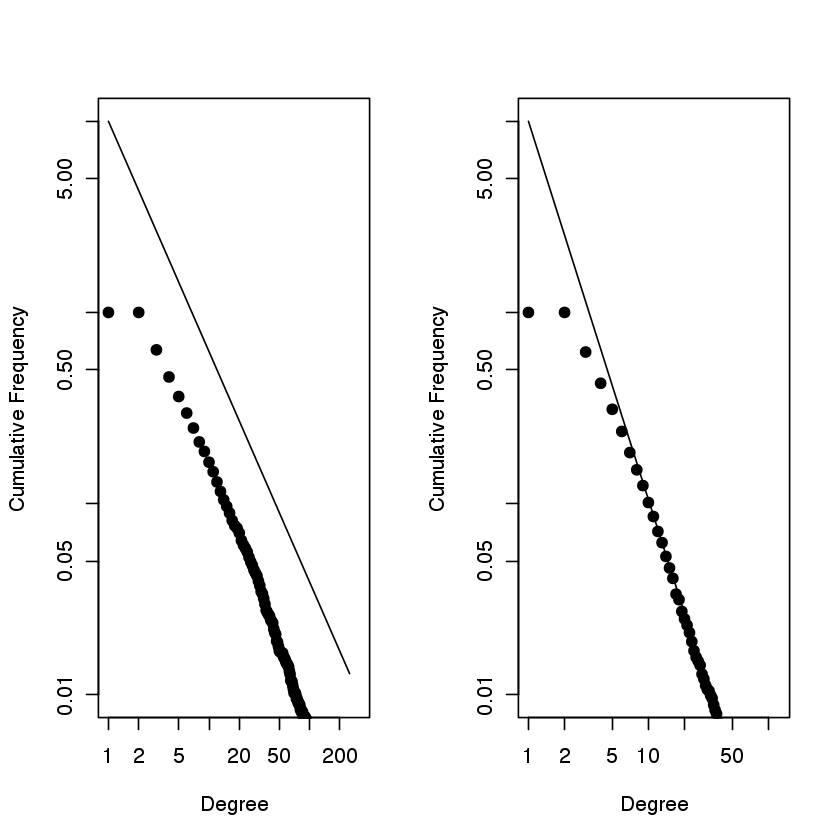

In [56]:
# 1 point
# 1d) Compare the node degree distributions of the 2 graphs. Do they both follow a power law distribution?
deg.distr<-degree.distribution(g,cumulative=T,mode="all")
all.deg<-degree(g,v=V(g),mode="all")
power<-power.law.fit(all.deg)
 
deg2.distr<-degree.distribution(g2,cumulative=T,mode="all")
all2.deg<-degree(g2,v=V(g2),mode="all")
power2<-power.law.fit(all2.deg)

par(mfrow=c(1,2))
plot(deg.distr,log="xy",
ylim=c(.01,10),
#xlim=c(0.1,150),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
lines(1:250,10*(1:250)^((-power$alpha)+1))

plot(deg2.distr,log="xy",
ylim=c(.01,10),
#xlim=c(0.1,150),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
lines(1:50,10*(1:50)^((-power2$alpha)+1))

power$KS.p
power2$KS.p

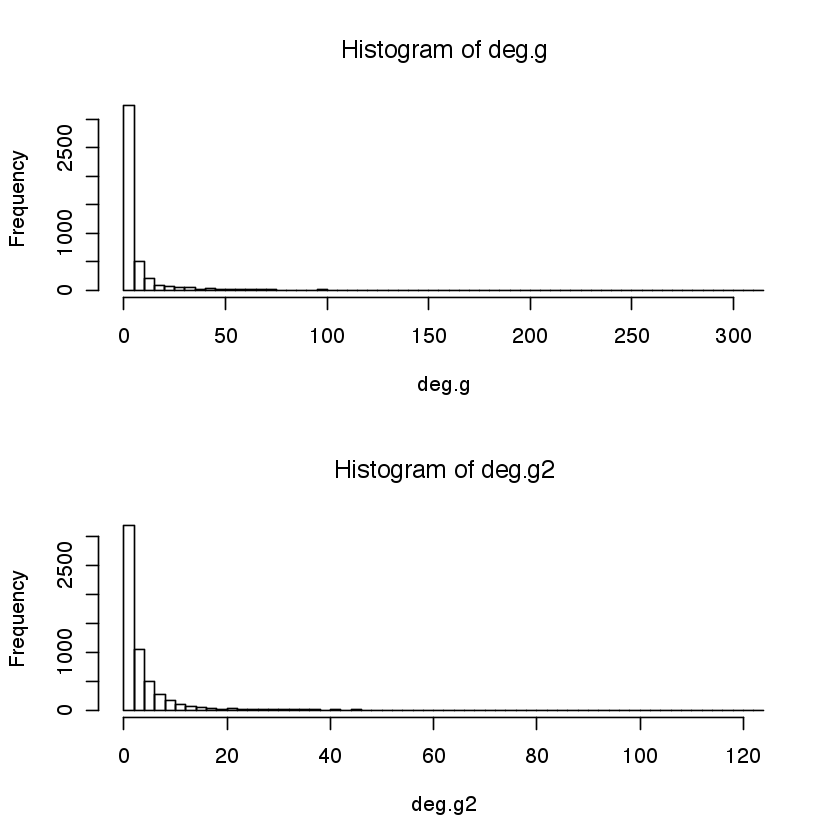

In [110]:
# Possible alternative solution to look at node degree distribution
deg.g<-degree(g,v=V(g),mode="all")
g.counts <- table(deg.g)

deg.g2<-degree(g2,v=V(g2),mode="all")
g2.counts <- table(deg.g2)

par(mfrow=c(2,1))
hist(deg.g,breaks=50)
hist(deg.g2,breaks=50)

# If they plot the degree distribution as a histogram (like this) it's fine, but they should still try to determine
# whether both plots follow a power law distribution. 

In [57]:
# 0.5 points
# 1e) Compare the diameters of the graph
diameter(g)
diameter(g2)

# No need to visualize the diameter but if they did, that's great

# Based on these analyses, would you conclude that the graphs are similar? 

# yes or no ok, but they should justify why
# examples: yes, the degree distributions are both power law distributed and the graphs are similar in size
#           no, the diameters are different or the literature-based graph has fewer edges but more nodes
#           no, the Y2H network is biased towards nodes of higher degree than the literature based-network

[1] 11

[1] 15

In [25]:
# Load in disease gene lists
mend <- scan("OMIM//Mendelian_HGNC.txt",what=as.character())
cancer <- scan("Cancer//cancer_genes.2_sources.txt",what=as.character())
length(mend)
length(cancer)

[1] 3768

[1] 193

In [28]:
# 1 point
# 2) Evaluate coverage of different gene sets in the graph
# 2a) Determine how many mendelian disease genes are in the graph
gmend <- genes[which(genes %in% mend)]
length(gmend)
# 2b) Determine how many cancer genes are in the graph
gcancer <- genes[which(genes %in% cancer)]
length(gcancer)
# 2c) Make a list of the nodes in the graph that are neither cancer nor mendelian disease genes
nondisease <- genes[-which(genes %in% c(mend,cancer))]
length(nondisease)

[1] 795

[1] 50

[1] 3494

In [46]:
# 1 point
# Repeat for literature based graph 
# Are more or less of the disease related genes present in the literature derived graph?
# 2d) Determine how many mendelian disease genes are in the graph
gmend2 <- genes2[which(genes2 %in% mend)]
length(gmend2)
# 2e) Determine how many cancer genes are in the graph
gcancer2 <- genes2[which(genes2 %in% cancer)]
length(gcancer2)
# 2f) Make a list of the nodes in the graph that are neither cancer nor mendelian disease genes
nondisease2 <- genes2[-which(genes2 %in% c(mend,cancer))]
length(nondisease2)

[1] 1646

[1] 163

[1] 3845

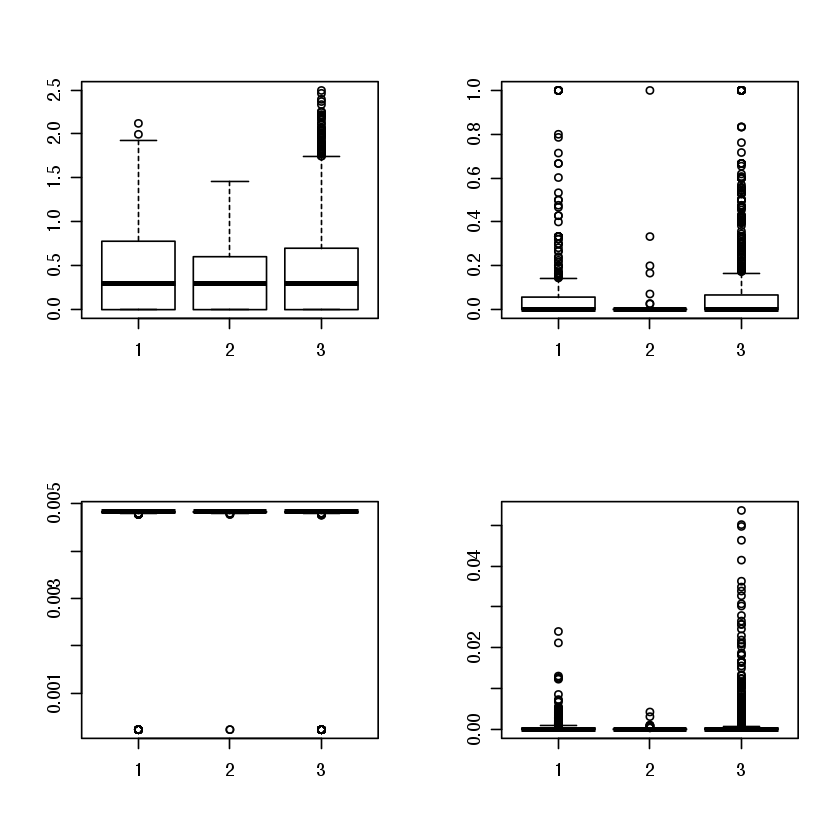

In [112]:
# 2 points (0.5 for each for a,b,c,d)
# 3) Compare graph measures between disease genes, cancer genes, and non-disease genes in the Y2H network
# 3a) plot degree distributions for each type of gene
mend.deg <- degree(g,v=gmend)
cancer.deg <- degree(g, v=gcancer)
non.deg <- degree(g, v=nondisease)
# 3b) plot clustering coeffcient distribution for each type of gene
mend.cc <- transitivity(g,v=gmend,type="local")
cancer.cc <- transitivity(g,v=gcancer,type="local")
non.cc <- transitivity(g,v=nondisease,type="local")
# 3c) plot closeness centrality for each type of gene
mend.cl <- closeness(g,v=gmend, normalized=T)
cancer.cl <- closeness(g,v=gcancer, normalized=T)
non.cl <- closeness(g, v=nondisease, normalized=T)
# 3d) plot betweenness centrality for each type of gene
mend.bc <- betweenness(g,v=gmend,normalized=T)
cancer.bc <- betweenness(g,v=gcancer,normalized=T)
non.bc <- betweenness(g,v=nondisease,normalized=T)

par(mfrow=c(2,2))
boxplot(log10(mend.deg), log10(cancer.deg), log10(non.deg))
boxplot(mend.cc, cancer.cc, non.cc)
boxplot(mend.cl, cancer.cl, non.cl)
boxplot(mend.bc, cancer.bc, non.bc)

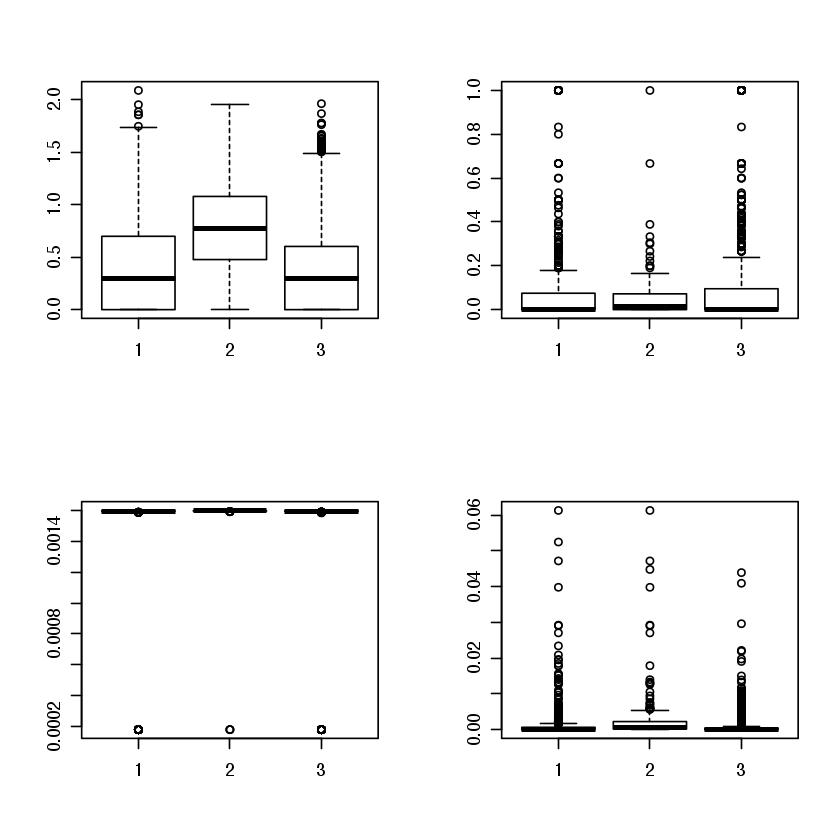

In [113]:
# 2 points (0.5 for each of a,b,c,d)
# Subtract 0.5 if the question at the bottom is skipped

# Now repeat for the literarture curated network
# Would you draw different conclusions using the literature based network?
# 3e) plot degree distributions for each type of gene
mend2.deg <- degree(g2,v=gmend2)
cancer2.deg <- degree(g2, v=gcancer2)
non2.deg <- degree(g2, v=nondisease2)
# 3f) plot clustering coeffcient distribution for each type of gene
mend2.cc <- transitivity(g2,v=gmend2,type="local")
cancer2.cc <- transitivity(g2,v=gcancer2,type="local")
non2.cc <- transitivity(g2,v=nondisease2,type="local")
# 3g) plot closeness centrality for each type of gene
mend2.cl <- closeness(g2,v=gmend2, normalized=T)
cancer2.cl <- closeness(g2,v=gcancer2, normalized=T)
non2.cl <- closeness(g2,v=nondisease2, normalized=T)
# 3h) plot betweenness centrality for each type of gene
mend2.bc <- betweenness(g2,v=gmend2,normalized=T)
cancer2.bc <- betweenness(g2,v=gcancer2,normalized=T)
non2.bc <- betweenness(g2,v=nondisease2,normalized=T)

par(mfrow=c(2,2))
boxplot(log10(mend2.deg), log10(cancer2.deg), log10(non2.deg))
boxplot(mend2.cc, cancer2.cc, non2.cc)
boxplot(mend2.cl, cancer2.cl, non2.cl)
boxplot(mend2.bc, cancer2.bc, non2.bc)

# Do your conclusions about the properties of these different classes of genes change when you use different networks?
# Cancer genes are more central than other genes in the literature network, but appear if anything, less central 
# in the Y2H network. In both networks, mendelian disease genes don't look much different than the non-disease genes. 

In [ ]:
# 2 points
# 0.5 for visualization, 1 for getting the motif counts and 0.5 for describing how the graphs differ in motif counts

# Next compare enrichment for 4 node motifs in the Y2H network versus the literature based network
# Hint: There are 6 unique motifs where edges connect all 4 nodes in an undirected graph, 
# there are 11 total motifs when the subgraph doesn't have to be connected

#Visualize the possible motifs
par(mfrow=c(3,5))
plot.igraph(graph.isocreate(size=4,0,directed=F))
plot.igraph(graph.isocreate(size=4,1,directed=F))
plot.igraph(graph.isocreate(size=4,2,directed=F))
plot.igraph(graph.isocreate(size=4,3,directed=F))
plot.igraph(graph.isocreate(size=4,4,directed=F))
plot.igraph(graph.isocreate(size=4,5,directed=F))
plot.igraph(graph.isocreate(size=4,6,directed=F))
plot.igraph(graph.isocreate(size=4,7,directed=F))
plot.igraph(graph.isocreate(size=4,8,directed=F))
plot.igraph(graph.isocreate(size=4,9,directed=F))
plot.igraph(graph.isocreate(size=4,10,directed=F))

# Use motifs() or graph.count.subisomorphisms.vf2() to compare motif occurences between Y2H and literature 
# derived graphs - note that the later is computationally more intensive
motifs(g, 4)
motifs(g2, 4)

# Do the graphs differ in terms of the number motifs? Which motifs are more common in the Y2H network? Which in the literature derived network? 

[1]       NA       NA       NA       NA 26910024       NA 11340689  1204177
 [9]   229909   121571     6292

[1]      NA      NA      NA      NA 1553554      NA 1168618   82671   10157
[10]    4956     354

In [ ]:
# Here's the graph.count.subisomorphisms.vf2() code 
# This takes a lot of resources to run for graphs this size.
# If this is done instead of using motifs() and the call to graph.count.subisomorphisms.vf2() is correct, give full credit 
subgraph.count<-c()
for(i in 1:11){
subgraph.count[i]<- graph.count.subisomorphisms.vf2(g,graph.isocreate(size=4,i-1,directed=F),vertex.color1=NULL,vertex.color2=NULL,edge.color1=NULL,edge.color2=NULL)
}
subgraph.count

subgraph.count.2<-c()
for(i in 1:11){
subgraph.count.2[i]<- graph.count.subisomorphisms.vf2(g2,graph.isocreate(size=4,i-1,directed=F),vertex.color1=NULL,vertex.color2=NULL,edge.color1=NULL,edge.color2=NULL)
}
subgraph.count.2

In [77]:
# +2 points
# Bonus: Are these motifs over-represented relative to similar random networks? 
# Hint: you can perform degree preserving permutation using rewire(g, with = keeping_degseq()) - see igraph documentation
#       The niter parameter is the number of edges that will be randomly reassigned
# Note: This might be computationally intensive

# Here is the command to rewire the Y2H graph 1 time
# randomgraph <- rewire(g, with=keeping_degseq(niter=10000)) # niter is the number of edges to rewire at random
# motifs(randomgraph,4)

# Generate 100 random newtorks and count the number of motifs in each
rgraphcounts <- c()
for (i in 1:100){
    randomgraph <- rewire(g, with=keeping_degseq(niter=10000))
    rgraphcounts <- rbind(rgraphcounts,motifs(randomgraph,4))
}

In [104]:
# Here's what the random motif count data looks like
head(rgraphcounts)

NA,NA,NA,NA,25949104,NA,15730750,2218719,116325,98890,4227
NA,NA,NA,NA,26092987,NA,15643380,2099472,117304,88462,3282
NA,NA,NA,NA,26167327,NA,15493638,2035108,111029,83860,3089
NA,NA,NA,NA,25993517,NA,15736068,2178124,117494,97365,4035
NA,NA,NA,NA,26158643,NA,15511117,2040636,114294,85478,3069
NA,NA,NA,NA,26128417,NA,15650652,2069748,111797,85689,3242


In [81]:
# Store the observed counts as variables for convenience
Y2Hcounts <- motifs(g, 4)
Litcounts <- motifs(g2, 4)

In [89]:
# Count how often the number of occurences in the actual graph was greater than in the random graph
# Normalize by the number of iterations
# Ignore motifs that weren't measured (NA)
Y2Hprobs <- c()
Litprobs <- c()
for (i in 1:length(Y2Hcounts)){
    p1 <- NA
    p2 <- NA
    if (! is.na(Y2Hcounts[i])){
        p1 <- sum(rgraphcounts[,i] >= Y2Hcounts[i])/length(rgraphcounts[,i])
        p2 <- sum(rgraphcounts[,i] >= Litcounts[i])/length(rgraphcounts[,i])
    }
    Y2Hprobs <- c(Y2Hprobs, p1)
    Litprobs <- c(Litprobs, p2)
}

In [90]:
# Which motifs are enriched?
Y2Hprobs
Litprobs

[1] NA NA NA NA  0 NA  1  1  0  0  0

[1] NA NA NA NA  1 NA  1  1  1  1  1

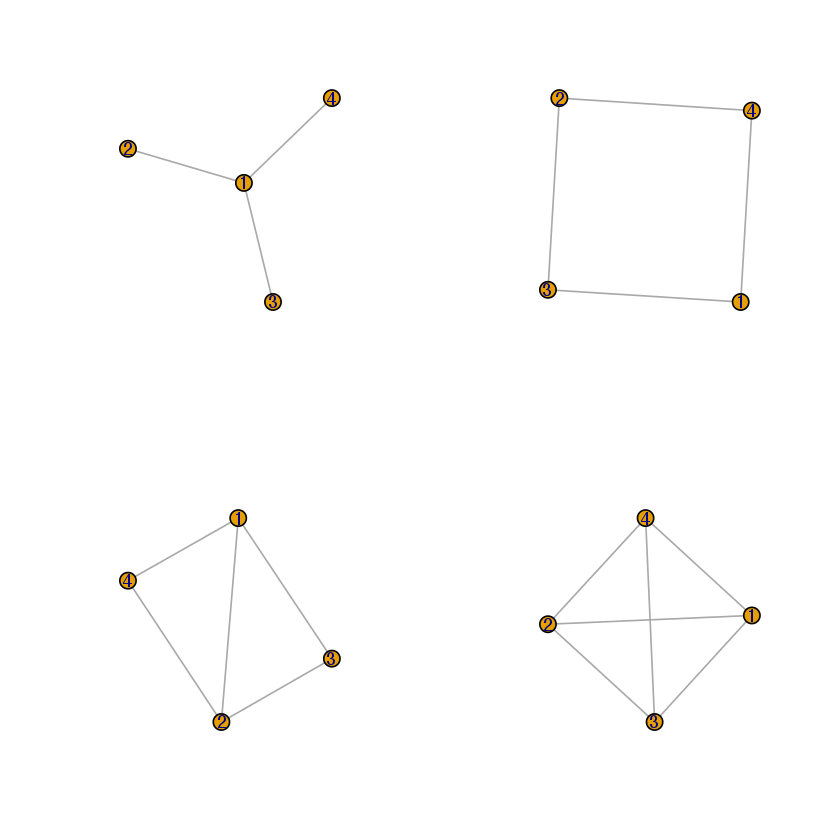

In [87]:
# These 4 way motifs appear to be overrepresented in the Y2H network
par(mfrow=c(2,2))
plot.igraph(graph.isocreate(size=4,4,directed=F))
plot.igraph(graph.isocreate(size=4,8,directed=F))
plot.igraph(graph.isocreate(size=4,9,directed=F))
plot.igraph(graph.isocreate(size=4,10,directed=F))